## Reproduce the MWIS example

In [16]:
from braket.ahs.hamiltonian import Hamiltonian
from braket.ahs.atom_arrangement import AtomArrangement
from braket.ahs.analog_hamiltonian_simulation import AnalogHamiltonianSimulation

from ahs_utils import show_register, rabi_pulse, get_drive, get_shift, show_drive_and_shift, show_final_avg_density, get_avg_density

import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

from braket.devices import LocalSimulator
device = LocalSimulator("braket_ahs")

from braket.aws import AwsDevice 
qpu = AwsDevice("arn:aws:braket:us-east-1::device/qpu/quera/Aquila")

omega_max = 15800000
omega_slew_rate_max = 250000000000000.0
shift_max = 125000000.0
shift_slew_rate_max = 2500000000000000.0
tmin = 5e-8
detuning_max = 125000000.0
t_ramp_omega = omega_max/omega_slew_rate_max
t_ramp_shift = shift_max/shift_slew_rate_max

print([t_ramp_omega, t_ramp_shift])

[6.32e-08, 5e-08]


# Define atom arrangement

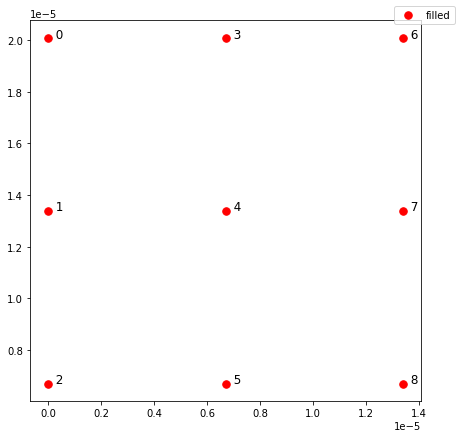

In [17]:
a = 6.7e-6
register = AtomArrangement()

for i in range(3):
    for j in range(3):
        register.add([i * a, (3-j) * a])

weights = [0.2644941963281552, 0.6335778085968484, 0.9270007203671269, 0.652086782270612, 0.2290203632098886, 0.20360950193403826, 0.05099139036585576, 0.26033471068539205, 0.010706550662904935]
# The solution is [2, 3, 7] given by julia
    
show_register(register)


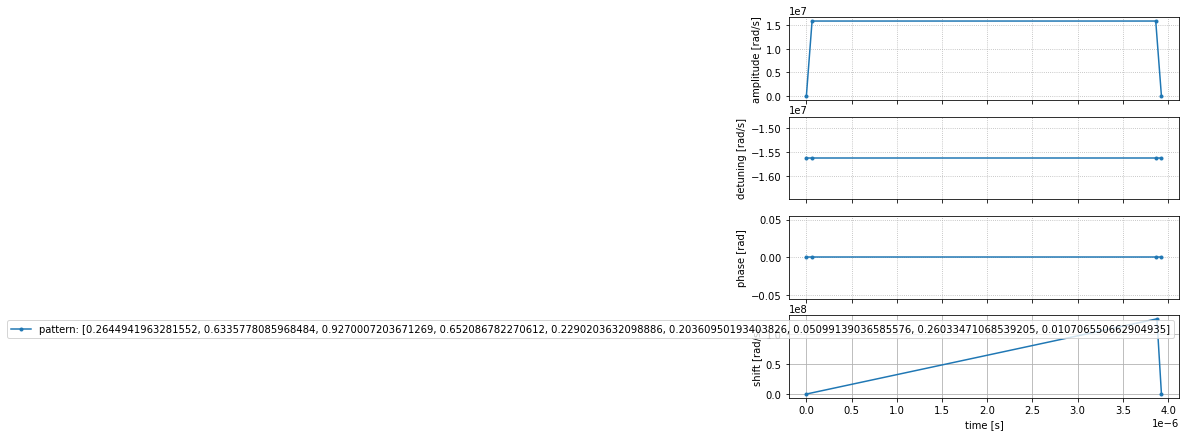

In [51]:
trange = np.linspace(0, 3.8e-6, 100)

# programs = []
# trange2 = []
# for ind_t, t in enumerate(trange):
    
#     time_points = [0, t_ramp_omega, t + t_ramp_omega, t + 2 * t_ramp_omega]
#     amplitude_values = [0, omega_max, omega_max, 0]
    
#     phase_values = [0 for _ in range(len(time_points))]
#     detuning_values = [-detuning_max/4 for _ in range(len(time_points))]
    
#     drive = get_drive(time_points, amplitude_values, detuning_values, phase_values)
      
# #     time_shift = [0, t + 2 * t_ramp_omega-t_ramp_shift, t + 2 * t_ramp_omega]
# #     value_shift = [0, shift_max, 0]

#     time_shift = [0, t + 2 * t_ramp_omega]
#     value_shift = [0, shift_max]
    
#     shift = get_shift(time_shift, value_shift, weights)

#     programs.append(
#         AnalogHamiltonianSimulation(
#             hamiltonian=drive+shift,
#             register=register
#         )
#     )
#     trange2.append(time_points[-1])   
    
#     if ind_t == len(trange)//2:
#         show_drive_and_shift(drive, shift)


time_points = [0, t_ramp_omega, trange[-1] + t_ramp_omega, trange[-1] + 2 * t_ramp_omega]
amplitude_values = [0, omega_max, omega_max, 0]

phase_values = [0 for _ in range(len(time_points))]
detuning_values = [-detuning_max/8 for _ in range(len(time_points))]

drive = get_drive(time_points, amplitude_values, detuning_values, phase_values)

time_shift = [0, trange[-1] + 2 * t_ramp_omega - t_ramp_shift, trange[-1] + 2 * t_ramp_omega]
value_shift = [0, shift_max, 0]

shift = get_shift(time_shift, value_shift, weights)


program = AnalogHamiltonianSimulation(
    hamiltonian=drive+shift,
    register=register
)

show_drive_and_shift(drive, shift)

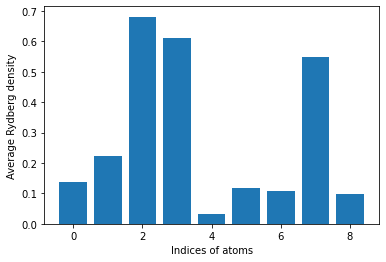

In [52]:
result = device.run(program, shots=1000, steps = 100, blockade_radius = a).result()
show_final_avg_density(result)